<h1> Informasi Peserta Pelatihan </h1>

- Nama : <a href="https://www.dicoding.com/users/muhiqsimui">Muhammad Iqbal</a>
- Domisili : Yogyakarta, Indonesia
- Email : muhiqsimui@gmail.com
- Bootcamp : **idcamp indosatooredoo**


<h1><b>Dicoding Final Submission - Klasifikasi Gambar</b></h1>
<h3>Kelas Belajar Machine Learning untuk Pemula</h3>

In [24]:
!python --version  #cek versi python yang digunakan
!pip --version #cek versi pip

Python 3.7.11
pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [25]:
import os,shutil
z='/content/rockpaperscissors.zip'
if os.path.exists(z): #jika direktori ditemukan maka cetak
  print('file sudah ada')
else:
  !wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip 



file sudah ada


**Persiapkan semua modul atau library yg akan digunakan**

In [26]:
import zipfile as zip #library yang digunakan untuk melakukan ekstraksi data

import matplotlib.image as gambar
import matplotlib.pyplot as plt #untuk plotting
import matplotlib.image as mpimg #untuk gambarnya
import numpy as np #untuk memanggil library numpy

from sklearn.model_selection import train_test_split #train_test_split digunakan untuk membagi dataset yg akan ditrain
import tensorflow as tf # Import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

**Ekstrak dataset `rockpaperscissors.zip` sebelum digunakan**

In [27]:
import zipfile as zip #library yang digunakan untuk melakukan ekstraksi data

nama_file='/content/rockpaperscissors.zip'  #untuk mengetahui lokasi file zip
ekstraksi=zip.ZipFile(nama_file,'r')  

#proses ekstraksi
ekstraksi.extractall('/content') #lakukan ekstrasi ke folder
ekstraksi.close() #tutup


In [28]:
ls rockpaperscissors #cek isi folder dataset

paper/  README_rpc-cv-images.txt  rock/  rps-cv-images/  scissors/


In [29]:
!cat rockpaperscissors/README_rpc-cv-images.txt #baca README di dalam rockpaperscissors.zip untuk mengetahui ringkasan informasi dataset 

AUTHOR: Julien de la Bruère-Terreault (drgfreeman@tuta.io)

LICENSE: CC-BY-SA 4.0

DESCRIPTION: This dataset contains images of hand gestures from the Rock-Paper-Scissors game. The images were captured as part of a hobby project where I developped a Rock-Paper-Scissors game using computer vision and machine learning on the Raspberry Pi (https://github.com/DrGFreeman/rps-cv)

CONTENTS: The dataset contains a total of 2188 images corresponding to the 'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand gestures of the Rock-Paper-Scissors game. All image are taken on a green background with relatively consistent ligithing and white balance.

FORMAT: All images are RGB images of 300 pixels wide by 200 pixels high in .png format. The images are separated in three sub-folders named 'rock', 'paper' and 'scissors' according to their respective class.



In [30]:
base ='/content/rockpaperscissors/rps-cv-images/'  #untuk menyimpan lokasi folder utama dimasukan ke variable base biar gampang di panggil

scissors = os.path.join(base+'scissors/') 
rock = os.path.join(base+'rock/')
paper = os.path.join(base+'paper/')

def cek_dir(list_dir):
  for z in list_dir: #lakukan perulangan sebanyak list_direktori
    if os.path.exists(z): #jika direktori ditemukan maka cetak
      print('tersedia untuk ',z)
    else: 
      print('belum tersedia untuk ',z)

def del_dir(path_dir): 
  shutil.rmtree(path_dir) #untuk hapus direktori

def cek_ds(q,x): #fungsi untuk cek data set
  print('Total '+q+' : ',len(os.listdir(x))) #cek jumlah dataset
  print('Lokasi file :',os.path.dirname(x)) #cek lokasi file
  print('Contoh File : ',os.listdir(x)[:3],'\n') #cek 3 data teratas folder

list_direktori = [rock,paper,scissors] #daftar direktori diatas
cek_dir(list_direktori)



print('\n-------------Cek Dataset-------------\n')
print("Total Dataset :",len(os.listdir(rock))+len(os.listdir(paper))+len(os.listdir(scissors)))
print('')
cek_ds('Gunting',scissors)
cek_ds('Batu',rock)
cek_ds('Kertas',paper)

tersedia untuk  /content/rockpaperscissors/rps-cv-images/rock/
tersedia untuk  /content/rockpaperscissors/rps-cv-images/paper/
tersedia untuk  /content/rockpaperscissors/rps-cv-images/scissors/

-------------Cek Dataset-------------

Total Dataset : 2188

Total Gunting :  750
Lokasi file : /content/rockpaperscissors/rps-cv-images/scissors
Contoh File :  ['a8DBHodNOhJCxQrN.png', '7M6QmAbgSaXFX9ES.png', 'gzAhbz3S2W0VukHE.png'] 

Total Batu :  726
Lokasi file : /content/rockpaperscissors/rps-cv-images/rock
Contoh File :  ['smfqjL7LuLnrPqo1.png', 'PqlEUvTdVyPPQUUI.png', 'oky5NsS9ymRXKVf8.png'] 

Total Kertas :  712
Lokasi file : /content/rockpaperscissors/rps-cv-images/paper
Contoh File :  ['HXxUlm3O2djcDgUR.png', '2DQbLQfHlfrcATqi.png', 'tW1oIjn0hlGLToAY.png'] 



**Visualisasikan data set**

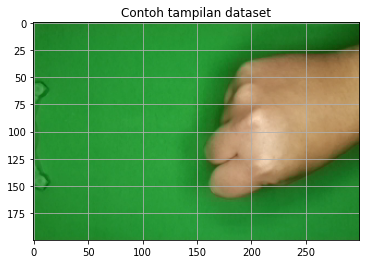

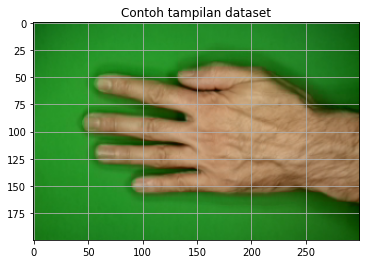

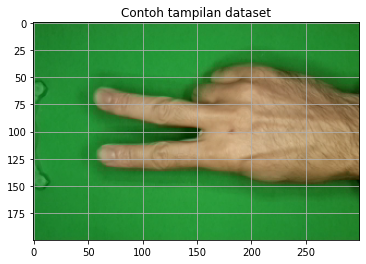

In [31]:
rock_files = os.listdir(rock) #list data batu
paper_files = os.listdir(paper) #list data kertas 
scissors_files = os.listdir(scissors) #list data gunting

pic_index = 1 #index
next_rock = [os.path.join(rock, fname) # (lokasi file, name yang akan dipake diperulangan dibawah)
                for fname in rock_files[pic_index-1:pic_index]] #untuk file bernama didalam folder path tampilkan sejumlah index 
next_paper = [os.path.join(paper, fname) 
                for fname in paper_files[pic_index-1:pic_index]]
next_scissors = [os.path.join(scissors, fname) 
                for fname in scissors_files[pic_index-1:pic_index]]



for i, img_path in enumerate(next_rock+next_paper+next_scissors): #img_path disini diambil dari 3 variable list diatas
  img = mpimg.imread(img_path) #membaca lokasi file gambar
  plt.imshow(img) #tampilkan gambar
  plt.grid() #biar ada garis nya
  plt.title(f'Contoh tampilan dataset') #judulnya
  plt.show() #tampilakan biar rapi aja

**Visualisasi greyscale**
tujuannya untuk mengecek data set benar benar menampilkan pola yang tepat 

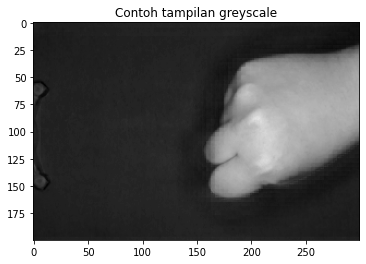

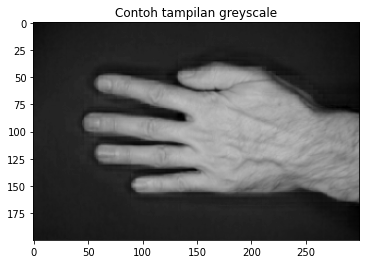

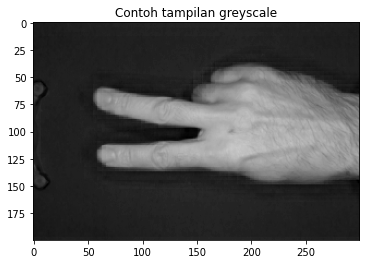

In [32]:
def setRgb(rgb): 
    return np.dot(rgb[...,:3], [0.9, 0.0, 0.0]) # untuk setingan list rgb 

for i, img_path in enumerate(next_rock+next_paper+next_scissors): 
  img = mpimg.imread(img_path)
  gray = setRgb(img) #masukan image path ke dalam variable dan fungsi untuk di jalankan
  plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1) 
  plt.title(f'Contoh tampilan greyscale')
  plt.show() 


**Membagi dataset**

In [33]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range= 0.2,
                    validation_split = 0.4, # diatur ke 0.4 itu = 40 %
                    fill_mode = 'nearest')

 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range= 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')

In [34]:
train_generator = train_datagen.flow_from_directory(
          base,                               # direktori dataset
          target_size = (100,150),            # ubah resolusi gambar jadi 100x150 piksel
          shuffle = True,                     #acak
          subset = 'training',
          class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
        base, 
        target_size=(100, 150),  
        subset='validation',
        shuffle = True,
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 15, 512)       

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


**Melatih model**

In [37]:
akurasi=0.99 #atur kondisi akurasi yang di inginkan 

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):  
	  if(logs.get('accuracy') > akurasi): #jika log dari akurasi mencapai akurasi yang ditentukan maka
		  print("\nAkurasi telah mencapai %2.2f%% , maka training akan dihentikan"%(akurasi*100)) #untuk menampilkan akurasi
		  self.model.stop_training = True #training akan dihentikan

callbacks = myCallback() # untuk memanggil kelas callback

In [38]:
latih=model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=31,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/31
20/20 - 19s - loss: 1.0982 - accuracy: 0.3672 - val_loss: 1.0919 - val_accuracy: 0.3438
Epoch 2/31
20/20 - 18s - loss: 0.9026 - accuracy: 0.5361 - val_loss: 0.6704 - val_accuracy: 0.6812
Epoch 3/31
20/20 - 18s - loss: 0.4945 - accuracy: 0.8049 - val_loss: 0.6278 - val_accuracy: 0.6812
Epoch 4/31
20/20 - 18s - loss: 0.5086 - accuracy: 0.7918 - val_loss: 0.5142 - val_accuracy: 0.7937
Epoch 5/31
20/20 - 18s - loss: 0.3330 - accuracy: 0.8672 - val_loss: 0.6626 - val_accuracy: 0.7563
Epoch 6/31
20/20 - 18s - loss: 0.3067 - accuracy: 0.8938 - val_loss: 0.2819 - val_accuracy: 0.9187
Epoch 7/31
20/20 - 19s - loss: 0.2836 - accuracy: 0.9047 - val_loss: 0.3189 - val_accuracy: 0.8875
Epoch 8/31
20/20 - 18s - loss: 0.2338 - accuracy: 0.9098 - val_loss: 0.1709 - val_accuracy: 0.9312
Epoch 9/31
20/20 - 18s - loss: 0.2511 - accuracy: 0.9094 - val_loss: 0.2141 - val_accuracy: 0.9375
Epoch 10/31
20/20 - 19s - loss: 0.1927 - accuracy: 0.9438 - val_loss: 0.2242 - val_accuracy: 0.9125
Epoch 11/

Akurasi tertinggi : 97.66 %
Akurasi rata-rata : 89.77 %


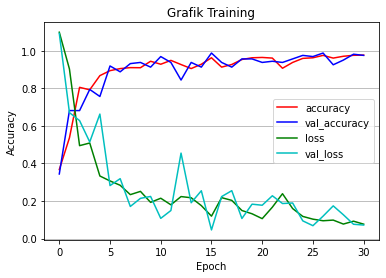

<Figure size 432x288 with 0 Axes>

In [39]:
loss=np.array(latih.history['loss'])
accuracy=np.array(latih.history['accuracy'])
val_loss=np.array(latih.history['val_loss'])
val_accuracy=np.array(latih.history['val_accuracy'])
Epoch = range(len(accuracy))

print("Akurasi tertinggi :",round(accuracy.max()*100,2),'%')
print("Akurasi rata-rata :",round((accuracy.sum()/len(accuracy))*100,2),'%')

plt.plot(Epoch, accuracy, 'r', label='accuracy')
plt.plot(Epoch, val_accuracy, 'b', label='val_accuracy')
plt.plot(Epoch, loss, 'g', label='loss')
plt.plot(Epoch, val_loss, 'c', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Grafik Training')
plt.grid(axis = 'y')
plt.legend(loc=0)
plt.figure()
plt.show()




In [40]:
from google.colab import files
def upload():
  uploaded = files.upload()
 
  for fn in uploaded.keys():
 
    # prediksi gambar
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10) 
  
    if classes[0, 0] == 1:
      print('kertas')
    elif classes[0, 1] == 1:
      print('batu')
    elif classes[0, 2] == 1:
      print('gunting')


Saving 4yPN1zUFqW6ROTgq.png to 4yPN1zUFqW6ROTgq.png
batu


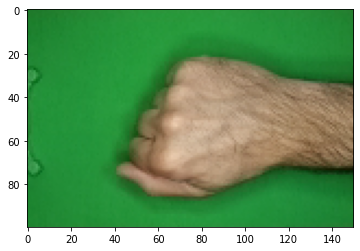

In [42]:
upload()

Saving BtUfOjTzw9EEvNHO.png to BtUfOjTzw9EEvNHO.png
gunting


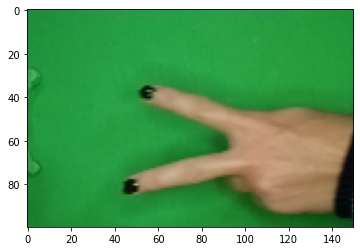

In [48]:
upload()

Saving 18801.jpg to 18801.jpg
kertas


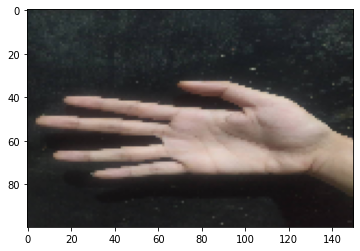

In [47]:
upload()